In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../data/IEEE_2024_positioning_evaluation.csv')

In [9]:
df.head(5)

,image,setup,ObjType,Position,Xgt,Ygt,Zgt,Xestimated,Yestimated,Zestimated,Manhattan,Euclidean
0,color_1_2_1.png,2D,Apple,1,-0.5,1.892,0,-0.517698,1.825541,0.084,0.16,0.101980
1,color_1_2_1.png,2D,Apple,2,0.0,1.892,0,0.000000,1.831002,0.081,0.14,0.100000
2,color_1_2_1.png,2D,Apple,3,0.5,1.892,0,0.507869,1.810251,0.087,0.18,0.120830
3,color_1_2_1.png,2D,Apple,4,-0.5,1.592,0,-0.516606,1.515359,0.081,0.17,0.108167
4,color_1_2_1.png,2D,Apple,5,0.0,1.593,0,0.001092,1.514267,0.078,0.16,0.113137


In [10]:
# chunks
# 2D
df_2D = df.loc[df['setup'] == '2D'].copy()
df_2D_apples = df.loc[(df['setup'] == '2D') & (df['ObjType'] == 'Apple')].copy()
df_2D_tennisballs = df.loc[(df['setup'] == '2D') & (df['ObjType'] == 'Tennis_ball')].copy()

# 3d
df_3D = df.loc[df['setup'] == '3D'].copy()
df_3D_apples = df.loc[(df['setup'] == '3D') & (df['ObjType'] == 'Apple')].copy()
df_3D_tennisballs = df.loc[(df['setup'] == '3D') & (df['ObjType'] == 'Tennis_ball')].copy()

In [17]:
df_2D_apples.describe()

,Position,Xgt,Ygt,Zgt,Xestimated,Yestimated,Zestimated,Manhattan,Euclidean
count,396.000000,396.000000,396.000000,396.0,396.000000,396.000000,396.000000,396.000000,396.000000
mean,8.000000,0.000000,1.292144,0.0,-0.003776,1.203513,0.061894,0.159318,0.111438
std,4.288932,0.408765,0.423285,0.0,0.418847,0.439411,0.019119,0.021916,0.014394
min,1.000000,-0.500000,0.687000,0.0,-0.527100,0.556799,0.007000,0.110000,0.078102
25%,4.000000,-0.500000,0.990000,0.0,-0.514660,0.879289,0.047000,0.140000,0.100000
50%,8.000000,0.000000,1.292000,0.0,-0.001090,1.206515,0.061000,0.160000,0.113578
75%,12.000000,0.500000,1.593000,0.0,0.504345,1.522826,0.076000,0.170000,0.122066
max,15.000000,0.500000,1.898000,0.0,0.517018,1.856585,0.112000,0.220000,0.142478


In [20]:
for df_chunk in [df_2D, df_2D_apples, df_2D_tennisballs, 
                 df_3D, df_3D_apples, df_3D_tennisballs]:
    
    rmse_manhattan = np.sqrt(np.sum(df_chunk['Manhattan'] ** 2) / df_chunk['Manhattan'].count())
    rmse_euclidean = np.sqrt(np.sum(df_chunk['Euclidean'] ** 2) / df_chunk['Euclidean'].count())

    print(rmse_manhattan, rmse_euclidean)

0.16073749783381766 0.11235086136466738
0.1608146872532594 0.11236102527122112
0.15730366951995883 0.11190273554396343
0.3515816642924751 0.2523047099573582
0.3253647809211999 0.234549095091622
0.4428356239402026 0.3145914757430174


In [33]:
# Define the list of dataframes
dataframes = {
    '2D': df_2D,
    '2D_apples': df_2D_apples,
    '2D_TB': df_2D_tennisballs,
    '3D': df_3D,
    '3D_apples': df_3D_apples,
    '3D_TB': df_3D_tennisballs
}

# Initialize a list to store the results
results = []

# Iterate through the dataframes and calculate RMSE values
for name, df_chunk in dataframes.items():
    rmse_manhattan = np.sqrt(np.sum(df_chunk['Manhattan'] ** 2) / df_chunk['Manhattan'].count())
    rmse_euclidean = np.sqrt(np.sum(df_chunk['Euclidean'] ** 2) / df_chunk['Euclidean'].count())

    results.append([name, rmse_manhattan, rmse_euclidean])

# Create a DataFrame from the results
rmse_df = pd.DataFrame(results, columns=['DataFrame', 'RMSE_Manhattan', 'RMSE_Euclidean'])

# Print the resulting DataFrame
print(np.round(rmse_df, 2))


   DataFrame  RMSE_Manhattan  RMSE_Euclidean
0         2D            0.16            0.11
1  2D_apples            0.16            0.11
2      2D_TB            0.16            0.11
3         3D            0.35            0.25
4  3D_apples            0.33            0.23
5      3D_TB            0.44            0.31


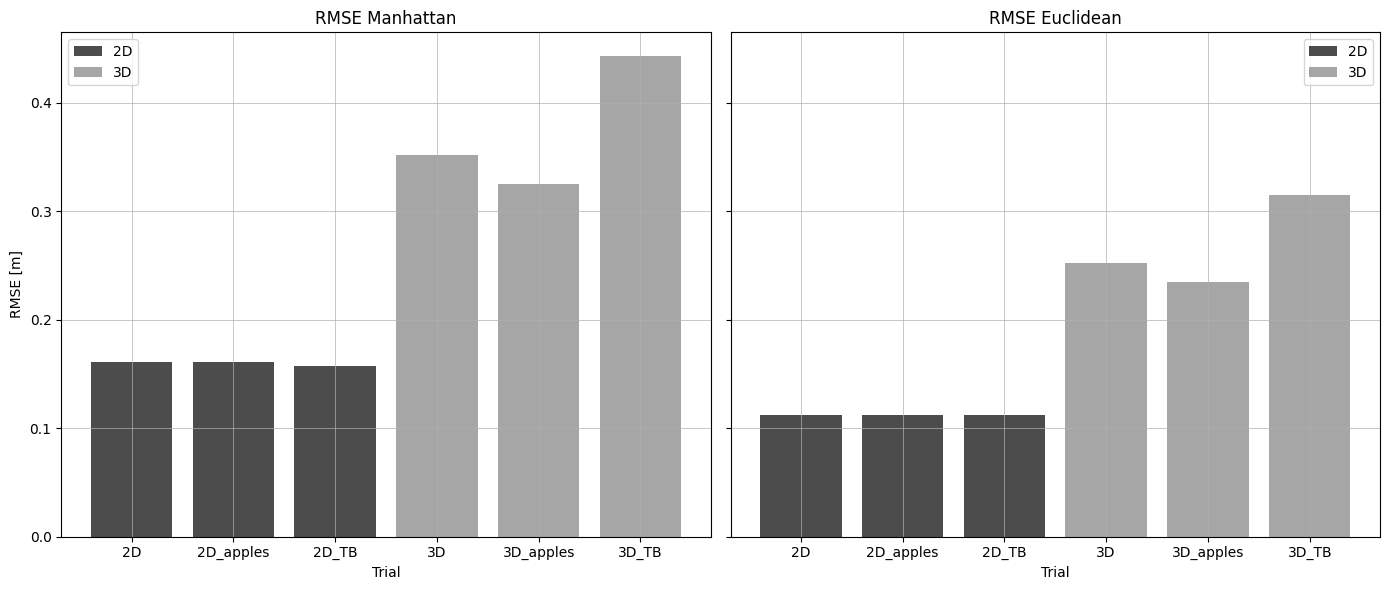

In [103]:
# Add a new column to differentiate between 2D and 3D
rmse_df['Dimension'] = rmse_df['DataFrame'].apply(lambda x: '2D' if '2D' in x else '3D')
rmse_df['Object'] = rmse_df['DataFrame'].apply(lambda x: 'apple' if 'apples' in x else 'TB')

# Plot the histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].grid(lw=.5)
# Histogram for RMSE_Manhattan
for dimension, color in zip(['2D', '3D'], ['k', 'gray']):
    subset = rmse_df[rmse_df['Dimension'] == dimension]
    axes[0].bar(subset['DataFrame'], subset['RMSE_Manhattan'], color=color, label=dimension, alpha=0.7)

axes[0].set_title('RMSE Manhattan')
axes[0].set_xlabel('Trial')
axes[0].set_ylabel('RMSE [m]')
axes[0].legend()


axes[1].grid(lw=.5)
# Histogram for RMSE_Euclidean
for dimension, color in zip(['2D', '3D'], ['k', 'gray']):
    subset = rmse_df[rmse_df['Dimension'] == dimension]
    axes[1].bar(subset['DataFrame'], subset['RMSE_Euclidean'], color=color, label=dimension, alpha=0.7)


axes[1].set_title('RMSE Euclidean')
axes[1].set_xlabel('Trial')
axes[1].legend()


plt.tight_layout()

plt.savefig('../data/outcome.png', dpi=400)
plt.show()


In [65]:
grouped_df = rmse_df.iloc[:, 1:-1].groupby('Dimension').mean()
grouped_df

,RMSE_Manhattan,RMSE_Euclidean
Dimension,,
2D,0.159619,0.112205
3D,0.373261,0.267148


In [104]:
rmse_df

,DataFrame,RMSE_Manhattan,RMSE_Euclidean,Dimension,Object
0,2D,0.160737,0.112351,2D,TB
1,2D_apples,0.160815,0.112361,2D,apple
2,2D_TB,0.157304,0.111903,2D,TB
3,3D,0.351582,0.252305,3D,TB
4,3D_apples,0.325365,0.234549,3D,apple
5,3D_TB,0.442836,0.314591,3D,TB


In [105]:
grouped_df = rmse_df.iloc[:, 1:].groupby(['Object', 'Dimension']).mean()
grouped_df

RMSE_Manhattan  RMSE_Euclidean
Object Dimension                                
TB     2D               0.159021        0.112127
       3D               0.397209        0.283448
apple  2D               0.160815        0.112361
       3D               0.325365        0.234549